In [1]:
import pandas as pd
import numpy as np
import scipy  as sc
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

<h4><center>About the dataset</center></h4>

<p>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.</p>

<div>
  <table style="margin: 0 auto;">
    <tr>
      <th>Attribute</th>
      <th>Description</th>
    </tr>
    <tr>
      <td><center>1</center></td>
      <td><center>ID number</center></td>
    </tr>
    <tr>
      <td><center>2</center></td>
      <td><center>Diagnosis (M = malignant, B = benign)</center></td>
    </tr>
    <tr>
      <td><center>3-32</center></td>
      <td><center>Ten real-valued features computed for each cell nucleus</center></td>
    </tr>
    <tr>
      <td><center>a)</center></td>
      <td><center>radius (mean of distances from center to points on the perimeter)</center></td>
    </tr>
    <tr>
      <td><center>b)</center></td>
      <td><center>texture (standard deviation of gray-scale values)</center></td>
    </tr>
    <tr>
      <td><center>c)</center></td>
      <td><center>perimeter</center></td>
    </tr>
    <tr>
      <td><center>d)</center></td>
      <td><center>area</center></td>
    </tr>
    <tr>
      <td><center>e)</center></td>
      <td><center>smoothness (local variation in radius lengths)</center></td>
    </tr>
    <tr>
      <td><center>f)</center></td>
      <td><center>compactness $\frac{perimeter^{2}}{area - 1.0}$ </center></td>
    </tr>
    <tr>
      <td><center>g)</center></td>
      <td><center>concavity (severity of concave portions of the contour)</center></td>
    </tr>
    <tr>
      <td><center>h)</center></td>
      <td><center>concave points (number of concave portions of the contour)</center></td>
    </tr>
    <tr>
      <td><center>i)</center></td>
      <td><center>symmetry</center></td>
    </tr>
    <tr>
      <td><center>j)</center></td>
      <td><center>fractal dimension ("coastline approximation" - 1)</center></td>
    </tr>
  </table>
</div>

<p>The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. All feature values are recoded with four significant digits. Missing attribute values: none Class distribution: 357 benign, 212 malignant</p>


In [2]:
data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


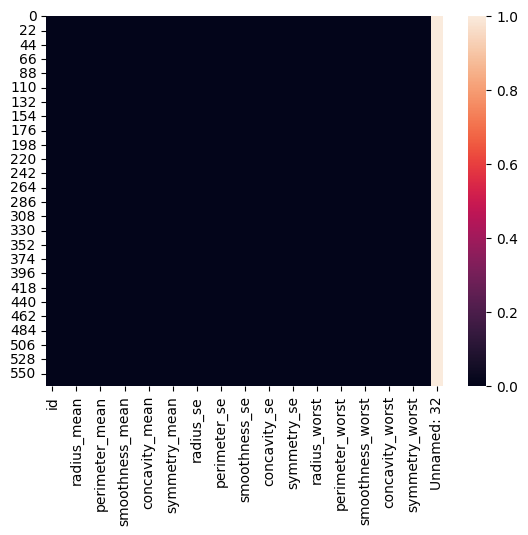

In [3]:
# removing null and unnecessary data
sns.heatmap(data.isnull()) # we see only in unamed:32
data.drop(columns = ["id","Unnamed: 32"],inplace = True)

#converting diagnosis into labels
for i in range(len(data)):
    if data.loc[i, 'diagnosis'] == 'M':
        data.loc[i, 'diagnosis'] = 1
    else:
        data.loc[i, 'diagnosis'] = 0
        

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

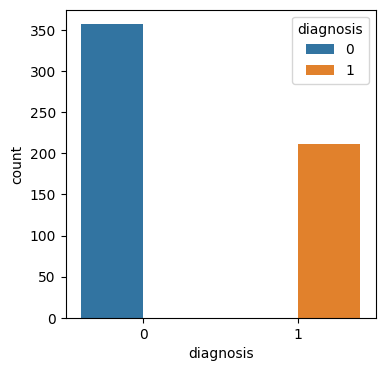

In [4]:
plt.figure(figsize=(4,4))
sns.countplot(data=data, x='diagnosis',hue='diagnosis')        

<h3>Preprocessing data</h3>

In [5]:
y = data['diagnosis']
x = data.drop(columns = ['diagnosis'])

y = np.array(y,dtype = int)
#normalizing the data as some are close to 0 other far from 0 
from sklearn.preprocessing import StandardScaler

# Create a scaler object instance
scaler = StandardScaler()

# Fit the scaler to the data and transform it
x_normalized = scaler.fit_transform(x)

x_normalized

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

<p>Note that the fit_transform method is a combination of two operations: 
fitting the scaler to the data to compute the mean and standard deviation, 
and then applying the transformation to the data. 
If you have a separate test dataset, you can use the
fit method to compute the mean and standard deviation based on 
the training data and then use the transform method to apply the same transformation to the test data.</p>
<p>Fit the scaler to the data </p>
scaler.fit(data)
<p>Transform the data</p>
normalized_data = scaler.transform(data)
 
 

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_normalized,y,test_size = 0.25,random_state = 16) 
# random-state is like seeding for randomizing

<h3>logistic Regression</h3>

In [7]:
class Logisticregression:
    def __init__(self):
        self.weights = np.array([])
        self.bias = np.array([])
    
    def initialize_parameters(self, num_features):
        self.weights = np.zeros(num_features,dtype=float)
        self.bias = np.array([0.0],dtype=float)
        
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    
    def gradients(self, x, y):
        num_samples = x.shape[0]
        z = np.array(np.dot(x,self.weights),dtype=float) + self.bias
        #careful that z must be numpy to apply sigmoid to each element with out looping as np.exp takes care
        predictions = self.sigmoid(z)
        
        # Compute gradients and taking averages
        dw = (1 / num_samples) * np.dot(x.T, (predictions - y))
        db = (1 / num_samples) * np.sum(predictions - y)
        return dw, db
    
    def train(self, x, y,lr = 0.01,max_iter=100):
        num_features = x.shape[1]
        
        self.initialize_parameters(num_features)

        # Gradient descent
        for i in range(max_iter):
            dw,db = self.gradients(x, y)
            self.weights = self.weights - lr*dw
            self.bias = self.bias - lr*db
        
    
    def predict(self, x):
        z = np.array(np.dot(x, self.weights),dtype=float) + self.bias
        predictions = self.sigmoid(z)
        binary_predictions = (predictions >= 0.5).astype(int) #True values to 1 and False values to 0
        return binary_predictions


In [8]:
model = Logisticregression()
model.train(x_train,y_train)
y_pred = model.predict(x_test)

<h3>Evaluation of model</h3>

In [9]:
from sklearn.metrics import accuracy_score,classification_report

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy with 0-1 loss:{accuracy}')
print(classification_report(y_test,y_pred))


Accuracy with 0-1 loss:0.9790209790209791
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        91
           1       0.98      0.96      0.97        52

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



<h3>Inference of report</h3>

* Accuracy with 0-1 loss: This value represents the accuracy of the model's predictions. It is the proportion of correct predictions (both true positives and true negatives) out of the total number of predictions. In this case, the accuracy is $0.97902$, which means that the model achieved an accuracy of approximately $97.9%$.

* Precision: Precision is a measure of the model's ability to correctly identify positive instances (in this case, class 1) out of the total instances predicted as positive. It is calculated as the ratio of true positives to the sum of true positives and false positives. For class 0, the precision is 0.98, which means that out of all instances predicted as class 0, 98% were actually class 0. For class 1, the precision is also 0.98, indicating that out of all instances predicted as class 1, 98% were actually class 1.

* Recall: Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive instances (class 1) out of the total actual positive instances. It is calculated as the ratio of true positives to the sum of true positives and false negatives. For class 0, the recall is 0.99, indicating that 99% of the actual class 0 instances were correctly identified. For class 1, the recall is 0.96, meaning that 96% of the actual class 1 instances were correctly identified.

* F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall. The F1-score ranges from 0 to 1, where a value of 1 represents the best possible score. For class 0, the F1-score is 0.98, and for class 1, it is 0.97.

* Support: Support refers to the number of samples in each class. In this case, there are 91 samples of class 0 and 52 samples of class 1 in the test set.

* Macro avg: Macro average calculates the average performance across all classes by treating each class equally. In this case, the macro average precision, recall, and F1-score are all 0.98.

* Weighted avg: Weighted average calculates the average performance across all classes, taking into account the number of samples in each class. The weighted average precision, recall, and F1-score are all 0.98, which means they are calculated by considering the class distribution in the test set.